<h1 style="color:red;">Lab 4</h1>

*Date: Thursday 15/4/2024*

<h2>Lab Objectives: Linear Regression</h2>
<ol>
    <li>Downloading the Boston Housing Dataset.</li>
    <li>Training a Simple Univariate Linear Regression model using a closed-form solution.</li>
    <li>Training a Multivariate Linear Regression using the Normal Equation.</li>
</ol>
<i>By Ahmed Qarqaz</i>




# Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Utilities

In [2]:
def make_scatter_plot(df, x_column, y_column=None, fit_line=None):
    """
    Plots a scatter plot of the values in the specified columns of the DataFrame.

    Parameters:
    - df: pandas.DataFrame containing the data.
    - x_column: str, the name of the column to use for the x-axis.
    - y_column: str, optional, the name of the column to use for the y-axis. If not provided, the index of the DataFrame will be used.
    - fit_line: bool, optional, whether to draw a best fit line or not. Default is True.
    """
    # Check if columns exist in DataFrame
    if x_column not in df.columns:
        print(f"Column '{x_column}' not found in DataFrame.")
        return
    if y_column is not None and y_column not in df.columns:
        print(f"Column '{y_column}' not found in DataFrame.")
        return

    # Extract values from the specified columns
    x_values = df[x_column]
    y_values = df[y_column] if y_column else df.index

    # Plot scatter plot
    plt.scatter(x_values, y_values, label='Data points', color='skyblue')

    # Plot best fit line if fit_line is True
    if fit_line:

        # Generate y values for the best fit line
        fit_line_values = fit_line["slope"] * x_values + fit_line["intercept"]

        # Plot the best fit line
        plt.plot(x_values, fit_line_values, label='Fit line', color='red')

    # Plot aesthetics
    plt.title(f'Scatter Plot of {x_column} vs {y_column if y_column else "Index"}')
    plt.xlabel(x_column)
    plt.ylabel(y_column if y_column else 'Index')
    plt.legend()

    plt.show()

# Reading the Dataset

In this lab, we will be using the <a href="https://www.kaggle.com/datasets/vikrishnan/boston-house-prices/data">Boston Housing Dataset</a>.

Attributes:
<ol>
    <li>CRIM:      per capita crime rate by town.</li>
    <li>ZN:        proportion of residential land zoned for lots over 25,000 sq.ft.</li>
    <li>INDUS:     proportion of non-retail business acres per town.</li>
    <li>CHAS:      Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).</li>
    <li>NOX:       nitric oxides concentration (parts per 10 million).</li>
    <li>RM:        average number of rooms per dwelling.</li>
    <li>AGE:       proportion of owner-occupied units built prior to 1940.</li>
    <li>DIS:       weighted distances to ﬁve Boston employment centers.</li>
    <li>RAD:       index of accessibility to radial highways.</li>
    <li>TAX:       full-value property-tax rate per \$10,000.</li>
    <li>PTRATIO:   pupil-teacher ratio by town 12. B: 1000(Bk−0.63)2 where Bk is the proportion of blacks by town 13. LSTAT: % lower status of the population.</li>
    <li>B:         1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.</li>
    <li>LSTAT:     % lower status of the population.</li>
</ol>

<big>Target: </big><span>MEDV:      Median value of owner-occupied homes in $1000's.</span>

In [3]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM',
                'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B',
                'LSTAT', 'MEDV']
df = pd.read_csv("../Datasets/Boston Housing/housing.csv",
                 sep=r"\s+", # regular expression
                 names=column_names)

In [4]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


## How the data looks like

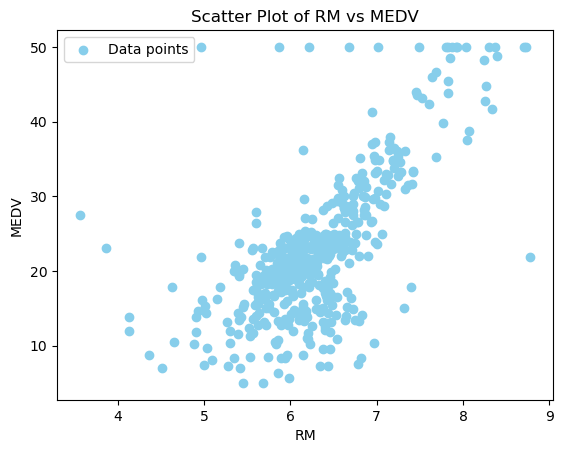

In [5]:
make_scatter_plot(df, x_column="RM", y_column="MEDV", fit_line=False) #RM , LSTAT

# Closed Form Solution for Simple Linear Regression

we are trying to calculate the values of the slope ($a$) and the intercept ($b$) for the model $f(x)$ where:

$f(x) = a * x + b $

caluclating the coefficients is what allows to make predictions for a single training/testing example where:

a single training example: $(x, y)$

and to make a prediction where, $f(x) = \hat{y}$

In [7]:
def find_coefficients_uni(df, x_column, y_column):
    """
    Function that estimates the optimal coefficents of a univariate linear regression model.
    
    Parameters
    ----------
    df : pandas.DataFrame
        dataframe object that contains the dataset.
    x_column : str
        name of the column that contains the value of the feature x.
    y_column : str
        name of the column that contains the value of the target y.    
    
    Returns
    -------
    dict
        dictionary that contains the slope and intercept of the linear function.
    """
    
    # get the columns as numpy vectors
    x = df[x_column].to_numpy()
    y = df[y_column].to_numpy()
    
    # calculate the average of each vector
    x_bar = np.average(df[x_column].to_numpy())
    y_bar = np.average(df[y_column].to_numpy())
    
    # perform the caluclation of each coefficient according to the closed form equation.
    # np.multiply is an element-wise opearation
    first_summation = sum(np.multiply((x-x_bar),(y-y_bar)))
    second_summation = sum(np.square(x-x_bar))
    
    a =  first_summation/ second_summation
    
    b = y_bar - (a*x_bar)
    
    return {
        "slope": a,
        "intercept": b,
    }

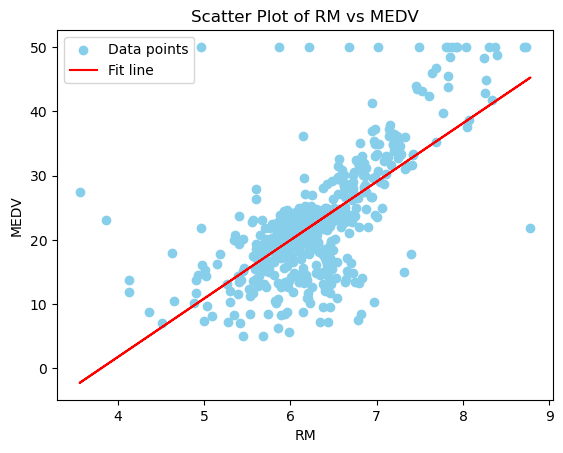

In [8]:
coefficients = find_coefficients_uni(df, x_column="RM", y_column="MEDV")

# coefficients["slope"] = 2
# coefficients["intercept"] = 10
make_scatter_plot(df, x_column="RM", y_column="MEDV", fit_line=coefficients)

# Calculating the Error
After training our model it is essential that we evaluate its performance. And we do that by using an error (cost) function.

There are many known error functions that can be used to evaluate a regression model, but we will Mean Sqaured Error.

Mean Sqaured Error:

$J(y, \hat{y}) = \frac{1}{n} \sum_{i=1}^{n} (\hat{y}_i - y_i) ^ 2$

where, $y$ and $\hat{y}$ are the ground-truth (target) and the prediction made the model respectively.

$n$ is the number of examples in the training (or testing) data

and $i$ is the index of the example

In [9]:
def error_func(y, y_hat):
    """
    function that calucaltes the mean sqaured error between two vectors.
    
    Parameters
    ----------
    y : numpy.Array
        vector that contains the original ground truth values of the trarget variable.
    y_hat : numpy.Array
        vector that contains the predicted values made by the model.
    
    Returns
    -------
    dict
        dictionary that contains the slope and intercept of the linear function.
    """
    return np.average(np.square(y-y_hat))


y = df["MEDV"].to_numpy()
y_hat = coefficients["slope"] * df["RM"] + coefficients["intercept"]

In [10]:
error_func(y, y_hat)

43.60055177116957

# Multivariate Linear Regression and the Normal Equation

a multivariate Linear regression model will contain multiple coefficients to adjust for multiple features

$f(x) = \Theta _{1} * x_{1} + \Theta _{2} * x_{2} +  ........ + \Theta _{j} * x_{j}$

$f(x) = \hat{y}$

where $j$ is the number of features.

There are multiple ways to find the optimal parameters (weights or coefficients) of model.

We will be using the "Normal Equation" to estimate those parameters which goes as follows:

$\theta = (X^{T} \cdot X)^{-1} \cdot X^{T} \cdot y$

where:


$
X = 
\begin{bmatrix}
 x_{1}^{1} & ... & x_{j}^{1}\\
 x_{1}^{2} & ... & x_{j}^{2}\\
 ... & ... & ...\\
 ... & ... & ...\\
 x_{j}^{i} & ... & x_{j}^{i}\\
\end{bmatrix}
$
&nbsp; &nbsp; and, &nbsp; &nbsp; &nbsp;
$
y = 
\begin{bmatrix}
 y^{1}\\
 y^{2}\\
 ...\\
 ...\\
 y^{i}\\
\end{bmatrix}
$

$i$ is the $i^{th}$ example of the dataset.

$j$ is the $j^{th}$ feature for an example. 

In [11]:
def find_coefficients_multi(df, x_columns, y_column):
    """
    Function that estimates the optimal coefficents of a multivariate linear regression model.
    
    Parameters
    ----------
    df : pandas.DataFrame
        dataframe object that contains the dataset.
    x_column : list
        list of names of the columns that contain the values of the features x1 to xj.
    y_column : str
        name of the column that contains the value of the target y.    
    
    Returns
    -------
    numpy.Array
        array that contains the values of all the coefficents theta.
    """
    X = df[x_columns].to_numpy()
    y = df[y_column].to_numpy()
    
    theta = np.linalg.inv( X.T @ X) @ X.T @ y
    
    return theta

In [12]:
theta = find_coefficients_multi(df,
                        x_columns = ['CHAS', 'NOX', 'RM',],
                        y_column = "MEDV")
theta.shape

(3,)

How we make predictions is by multiplying the feature ($X$) vector (or matrix in case of multiple examples) with the theta ($\theta$) vector:


\begin{align} 
f(x) &=  \Theta _{1} * x_{1} + \Theta _{2} * x_{2} +  ........ + \Theta _{j} * x_{j} \\ 
 &=  \hat{y}
\end{align}

In [13]:
df.head(4)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4


In [14]:
def make_prediction(X, theta):
    """
    Function That makes predictions based on the values of theta.
    
    Parameters
    ----------
    X : numpy.Array
        Array that contains the values of features for multiple examples
        dim (or shape) is equal to (i, j).
    theta : numpy.Array
        Array that contains the values of coefficents for the linear regression model.
        dim (or shape) is equal to (j, 1).
    
    Returns
    -------
    numpy.Array
        array that contains the predicted values y_hat.
    """
    return X @ theta

# get the features for n examples
n = 4
X = df[['CHAS', 'NOX', 'RM',]].to_numpy()[0:n]

y_hat = make_prediction(X, theta)
y_hat

array([24.47468584, 25.51416698, 30.14566921, 29.32658755])

In [15]:
y = df["MEDV"].to_numpy()[0:n]

error = error_func(y, y_hat)
error

13.220161928928107

## Adjusting the Model Parameters
The equation for the multivariate model we eariler discuessed is missing a key component.

And that is the "Bias", which we eariler called the intercept in the case of a univariate model.
The bias is a coefficient that is not multiplied by a feature value. 

$f(x) \quad=\quad x_{0}*\theta _{0} \quad+\quad \Theta _{1} * x_{1} \quad+\quad \Theta _{2} * x_{2} \quad+\quad  ........ \quad+\quad \Theta _{j} * x_{j} $

where, $x_{0} = 1$ and $\theta _{0}$ is the bias

so the final version of the equation becomes:

$f(x) \quad=\quad \Theta _{1} * x_{1} \quad+\quad \Theta _{2} * x_{2} \quad+\quad  ........ \quad+\quad \Theta _{j} * x_{j} \quad+\quad c$

where, $c =x_{0}*\theta _{0}$

In [16]:
def find_coefficients_multi_1(df, x_columns, y_column):
    """
    Function that estimates the optimal coefficents of a multivariate linear regression model.
    This version adds a bias.
    
    Parameters
    ----------
    df : pandas.DataFrame
        dataframe object that contains the dataset.
    x_column : list
        list of names of the columns that contain the values of the features x1 to xj.
    y_column : str
        name of the column that contains the value of the target y.    
    
    Returns
    -------
    numpy.Array
        array that contains the values of all the coefficents theta.
    """
    X = df[x_columns].to_numpy()
    X = np.c_[np.ones(shape=X.shape[0]), X]
    
    y = df[y_column].to_numpy()
    
    theta = np.linalg.inv( X.T @ X) @ X.T @ y
    
    return theta

In [17]:
theta = find_coefficients_multi_1(df,
                                  x_columns = ['CHAS', 'NOX', 'RM',],
                                  y_column = "MEDV")
theta

array([-16.19424196,   5.20059787, -20.46066759,   7.91084275])

In [18]:
def make_prediction(X, theta):
    """
    Function That makes predictions based on the values of theta.
    
    Parameters
    ----------
    X : numpy.Array
        Array that contains the values of features for multiple examples
        dim (or shape) is equal to (i, j).
    theta : numpy.Array
        Array that contains the values of coefficents for the linear regression model.
        dim (or shape) is equal to (j, 1).
    
    Returns
    -------
    numpy.Array
        array that contains the predicted values y_hat.
    """
    X = np.c_[np.ones(shape=X.shape[0]), X]
    return X @ theta

# get the features for n examples
n = 4
X = df[['CHAS', 'NOX', 'RM',]].to_numpy()[0:n]

y_hat = make_prediction(X, theta)
y_hat

array([24.81170993, 25.00522621, 31.04911007, 29.79484982])

In [19]:
y = df["MEDV"].to_numpy()[0:n]

error = error_func(y, y_hat)
error

9.645135911598672

# Using Scikit learn

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
model = LinearRegression()
X = df[['CHAS', 'NOX', 'RM',]].to_numpy()

model.fit(X, df["MEDV"])
a = model.coef_
b = model.intercept_

print("Coefficiens :", a)
print("interecept :", b)

Coefficiens : [  5.20059787 -20.46066759   7.91084275]
interecept : -16.19424196413492
